In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [49]:
d = 2 # Number of dimensions
mean = np.array([[0], 
                 [2]]) 
covariance = np.array([[0.3, -1], 
                       [-1 , 5]])

# Compute the Decomposition:
A = np.linalg.cholesky(covariance)
 
# Sample X from standard normal
n = 50 # Samples to draw
Z = np.random.normal(size=(d, n)) # random noise matrix
X = mean + A.dot(Z)# Apply the transformation: mean + noise

In [51]:
# 2D distribution will be over variables x1 and x2
x1 = np.linspace(-1.5, 1.5, n) # horizontal axis
x2 = np.linspace(-4, 8, n) # vertical axis
x1, x2 = np.meshgrid(x1, x2)

# Pack x1 and x2 into a single 3D array
pos = np.empty(x1.shape + (2,))
pos[:,:,0] = x1
pos[:,:,1] = x2

# The correct model of bivariate Gaussian distribution
def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    mu.shape = (1, 2)
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

model = multivariate_gaussian(pos, mean, covariance)

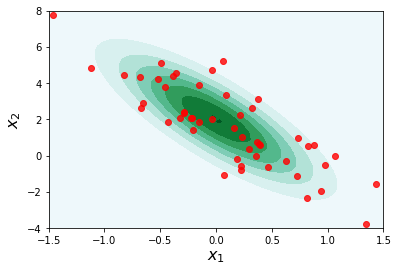

In [52]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)

ax.plot(X[0,:], X[1,:], 'ro', alpha=0.8)
ax.contourf(x1, x2, model, cmap=cm.BuGn)
plt.show()